In [5]:
import pandas as pd
import seaborn as sns

In [6]:
df= pd.read_csv("student-mat.csv",delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
X = df[['G1', 'G2', 'absences','studytime']]
y = df['G3']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [11]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print (mse_linear)
print(r2_linear)

4.253474472421518
0.8065024928556157


In [12]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print (mse_rf)
print(r2_rf)

2.91288090001715
0.8674882860079962


In [13]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print (mse_gb)
print(r2_gb)

2.650320394357578
0.8794325926328748


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(mse_dt)
print(r2_dt)

3.880252100840336
0.8234809886664439


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(mse_knn)
print(r2_knn)

3.9559663865546226
0.8200366220349001


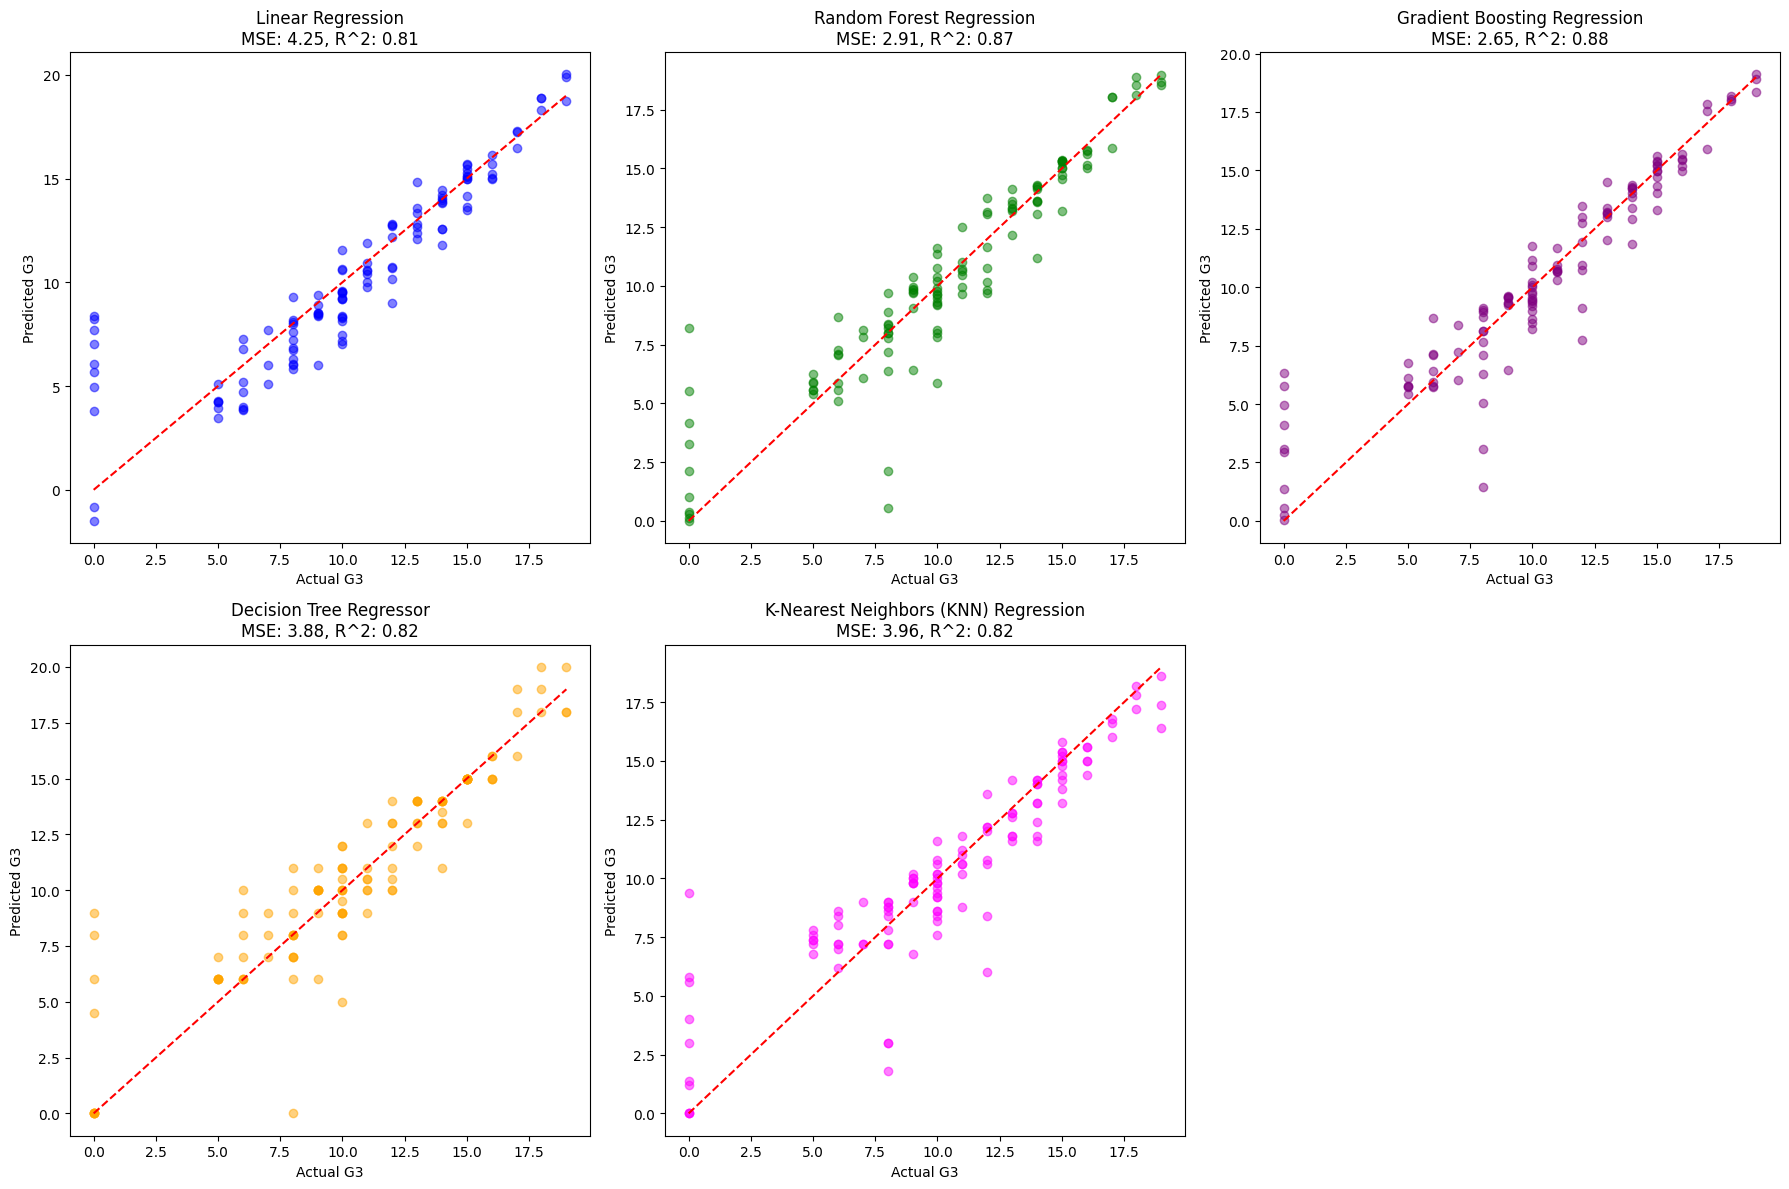

In [16]:
plt.figure(figsize=(18, 12))

# Plot Linear Regression predictions vs. actual values
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Linear Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_linear, r2_linear))

# Plot Random Forest Regression predictions vs. actual values
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Random Forest Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_rf, r2_rf))

# Plot Gradient Boosting Regression predictions vs. actual values
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_gb, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Gradient Boosting Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_gb, r2_gb))

# Plot Decision Tree Regressor predictions vs. actual values
plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Decision Tree Regressor\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_dt, r2_dt))

# Plot K-Nearest Neighbors (KNN) Regression predictions vs. actual values
plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_knn, color='magenta', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('K-Nearest Neighbors (KNN) Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_knn, r2_knn))

plt.tight_layout()
plt.show()


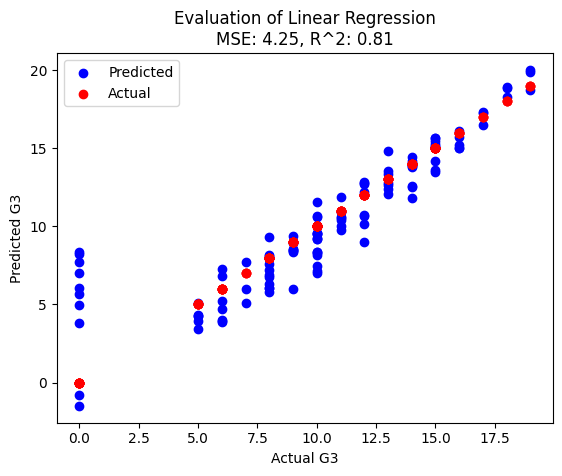

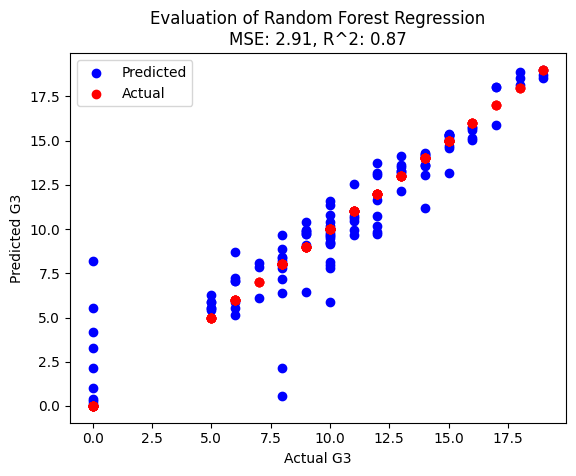

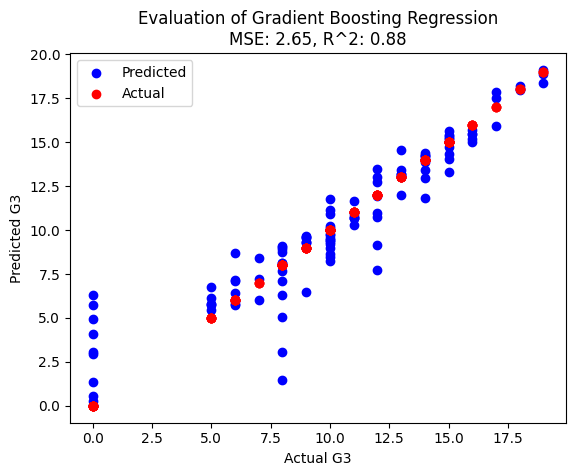

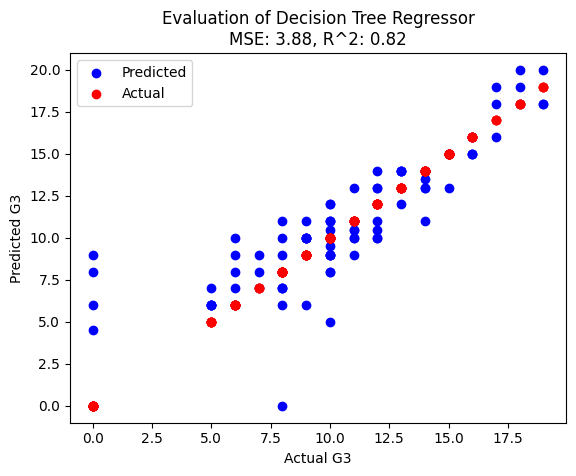

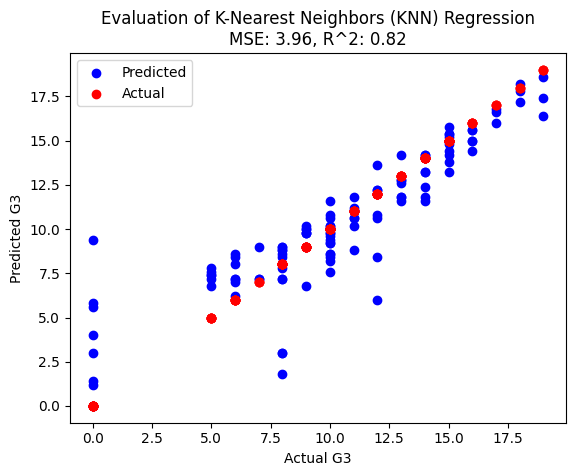

In [17]:
def plot_predictions(y_test, y_pred, model_name, mse, r2):
    plt.scatter(y_test, y_pred, color='blue', label='Predicted')
    plt.scatter(y_test, y_test, color='red', label='Actual')
    plt.xlabel("Actual G3")
    plt.ylabel("Predicted G3")
    plt.title(f"Evaluation of {model_name}\nMSE: {mse:.2f}, R^2: {r2:.2f}")
    plt.legend()
    plt.show()

# Linear Regression model
plot_predictions(y_test, y_pred_linear, 'Linear Regression', mse_linear, r2_linear)

# Random Forest Regression model
plot_predictions(y_test, y_pred_rf, 'Random Forest Regression', mse_rf, r2_rf)

# Gradient Boosting Regression model
plot_predictions(y_test, y_pred_gb, 'Gradient Boosting Regression', mse_gb, r2_gb)

# Decision Tree Regressor model
plot_predictions(y_test, y_pred_dt, 'Decision Tree Regressor', mse_dt, r2_dt)

# K-Nearest Neighbors (KNN) Regression model
plot_predictions(y_test, y_pred_knn, 'K-Nearest Neighbors (KNN) Regression', mse_knn, r2_knn)